<a href="https://colab.research.google.com/github/bill-close/Machine_Learning_LR_Predicting-Stockmarket/blob/main/Predicting_the_Stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Predicting the Stockmarket** <centre>

## Introduction
**Aim:**
The aim is to ....

In [ ]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
%load_ext google.colab.data_table

I will try the new dynamic dataframes with colab as per below:

**Enable this extension with**  
%load_ext google.colab.data_table       
**and disable it with**          
%unload_ext google.colab.data_table          

Reading the csv file

In [ ]:
stock = pd.read_csv('/content/drive/MyDrive/Stockmarket_Project/sphist.csv')

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


Formatting the date column so we can use it

In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [ ]:
stock = stock.sort_values(by=['Date'], ascending=True)
stock.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999


## Generating Indicators


- The average price from the past 5 days.
- The average price for the past 30 days.
- The average price for the past 365 days.
- The ratio between the average price for the past 5 days, and the average price for the past 365 days.
- The standard deviation of the price over the past 5 days.
- The standard deviation of the price over the past 365 days.
- The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.


In [ ]:
# The 5, 30, 365 day trends:
stock["Avg_5Day"] = stock["Close"].rolling(5).mean().shift(1)
stock["Avg_30Day"] = stock["Close"].rolling(30).mean().shift(1)
stock["Avg_365Day"] = stock["Close"].rolling(365).mean().shift(1)

In [ ]:
# The ratio between the average price for the past 5 days, and the average price for the past 365 days.
stock['Avg_5D_365D_Ratio'] = stock['Avg_5Day'] / stock['Avg_365Day']

In [ ]:
# The standard deviation for the 5 day and 365 day with ratio comparison
stock["Std_Dev_5Day"] = stock["Close"].rolling(5).std().shift(1)
stock["Std_Dev_365Day"] = stock["Close"].rolling(365).std().shift(1)
stock['Std_5D_365D_Ratio'] = stock['Std_Dev_5Day'] / stock['Std_Dev_365Day']
stock.iloc[360:370, :] # This display shows the critical point where NANs stop at the date of 1952-06-19

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio
16229,1951-06-12,21.520000,21.520000,21.520000,21.520000,1200000.0,21.520000,21.494,21.842000,NaN,NaN,0.105972,NaN,NaN
16228,1951-06-13,21.549999,21.549999,21.549999,21.549999,1060000.0,21.549999,21.532,21.811667,NaN,NaN,0.053573,NaN,NaN
16227,1951-06-14,21.840000,21.840000,21.840000,21.840000,1300000.0,21.840000,21.546,21.779000,NaN,NaN,0.045056,NaN,NaN
16226,1951-06-15,22.040001,22.040001,22.040001,22.040001,1370000.0,22.040001,21.602,21.753000,NaN,NaN,0.140250,NaN,NaN
16225,1951-06-18,22.049999,22.049999,22.049999,22.049999,1050000.0,22.049999,21.712,21.727333,NaN,NaN,0.222194,NaN,NaN
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,1.120954,0.256223,1.790253,0.143121
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,1.125246,0.213659,1.789307,0.119409
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,1.128142,0.092574,1.788613,0.051758
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,1.126757,0.115108,1.787659,0.064390
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,1.121008,0.204132,1.786038,0.114293


Removing rows that have NANs. This has happended due to that we relied on the averaging of values that can reach up to a year. Hence the first year of values will have NANs and this is should not be included when we do the split for ML

In [ ]:
# I could use "stocks = stocks.dropna(axis = 0)" but let try a more controlled method via dates

# Keeping the entries on and after 1952-06-19
stock_clean = stock[stock['Date'] >= '1952-06-19']
stock_clean.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio
15974,1952-06-19,24.510000,24.510000,24.510000,24.510000,1320000.0,24.510000,24.348,23.962333,22.824548,1.066746,0.053104,1.014932,0.052323
15973,1952-06-20,24.590000,24.590000,24.590000,24.590000,1190000.0,24.590000,24.388,23.985667,22.835014,1.068009,0.083786,1.012553,0.082747
15972,1952-06-23,24.559999,24.559999,24.559999,24.559999,1200000.0,24.559999,24.432,24.010000,22.845206,1.069459,0.121326,1.011441,0.119954
15971,1952-06-24,24.600000,24.600000,24.600000,24.600000,1200000.0,24.600000,24.484,24.034000,22.855315,1.071261,0.105261,1.010084,0.104210
15970,1952-06-25,24.660000,24.660000,24.660000,24.660000,1230000.0,24.660000,24.538,24.062333,22.865178,1.073160,0.069785,1.009494,0.069129
15969,1952-06-26,24.750000,24.750000,24.750000,24.750000,1190000.0,24.750000,24.584,24.091667,22.874877,1.074716,0.055046,1.009687,0.054517
15968,1952-06-27,24.830000,24.830000,24.830000,24.830000,1210000.0,24.830000,24.632,24.127333,22.885562,1.076312,0.075300,1.008835,0.074640
15967,1952-06-30,24.959999,24.959999,24.959999,24.959999,1380000.0,24.959999,24.680,24.168333,22.895534,1.077939,0.110227,1.010019,0.109134
15966,1952-07-01,25.120001,25.120001,25.120001,25.120001,1450000.0,25.120001,24.760,24.215000,22.906082,1.080936,0.141950,1.011423,0.140347
15965,1952-07-02,25.059999,25.059999,25.059999,25.059999,1320000.0,25.059999,24.864,24.265333,22.916548,1.084980,0.180638,1.014517,0.178053


In [ ]:
# No more NANs 
stock_clean.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adj Close            0
Avg_5Day             0
Avg_30Day            0
Avg_365Day           0
Avg_5D_365D_Ratio    0
Std_Dev_5Day         0
Std_Dev_365Day       0
Std_5D_365D_Ratio    0
dtype: int64

In [ ]:
train = stock_clean[stock_clean['Date'] < '2013-01-01']
test = stock_clean[stock_clean['Date'] >= '2013-01-01']
print()
print("train: {} values ==> {}%".format(len(train), round((len(train) / len(stock)) * 100, 2)))
print()
print("test: {} values =====>  {}%".format(len(test), round((len(test) / len(stock)) * 100, 2)))
train.head()


train: 15236 values ==> 91.84%

test: 739 values =====>  4.45%


,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio
15974,1952-06-19,24.510000,24.510000,24.510000,24.510000,1320000.0,24.510000,24.348,23.962333,22.824548,1.066746,0.053104,1.014932,0.052323
15973,1952-06-20,24.590000,24.590000,24.590000,24.590000,1190000.0,24.590000,24.388,23.985667,22.835014,1.068009,0.083786,1.012553,0.082747
15972,1952-06-23,24.559999,24.559999,24.559999,24.559999,1200000.0,24.559999,24.432,24.010000,22.845206,1.069459,0.121326,1.011441,0.119954
15971,1952-06-24,24.600000,24.600000,24.600000,24.600000,1200000.0,24.600000,24.484,24.034000,22.855315,1.071261,0.105261,1.010084,0.104210
15970,1952-06-25,24.660000,24.660000,24.660000,24.660000,1230000.0,24.660000,24.538,24.062333,22.865178,1.073160,0.069785,1.009494,0.069129


In [ ]:
test.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,1.068629,9.820801,90.463948,0.108560
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,1.073714,22.261321,90.738976,0.245334
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,1.079412,26.274326,90.995857,0.288742
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,1.086423,27.945242,91.279049,0.306152
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,1.095093,16.453319,91.544368,0.179731


## Implementing the ML for Linear Regression

In [ ]:
# Lists
features = train.columns.drop(['Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
target = ['Close']
temp_df = pd.DataFrame(test['Close'])
features

Index(['Avg_5Day', 'Avg_30Day', 'Avg_365Day', 'Avg_5D_365D_Ratio',
       'Std_Dev_5Day', 'Std_Dev_365Day', 'Std_5D_365D_Ratio'],
      dtype='object')

In [ ]:
# ML
lr = LinearRegression()
lr.fit(train[features], train[target])
temp_df['Predictions'] = lr.predict(test[features])
temp_df['error'] = np.absolute(temp_df['Predictions'] - temp_df['Close'])
mae = temp_df['error'].mean()
mae

16.145383782900087

In [ ]:
# This is just to see the calculations for the above MAE
temp_df.head()

,Close,Predictions,error
738,1462.420044,1419.353342,43.066702
737,1459.369995,1425.504893,33.865102
736,1466.469971,1433.378890,33.091081
735,1461.890015,1443.359848,18.530167
734,1457.150024,1457.054628,0.095396


## Adding more indicators
Adding some other indicators to improve the predictions

- The average volume over the past five days.
- The average volume over the past year.
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The year component of the date.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.
- The month component of the date.
- The day of week.
- The day component of the date.
- The number of holidays in the prior month.



In [ ]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Looking at volume
stock['Vol_Avg_5Day'] = stock['Volume'].rolling(5).mean().shift(1)
stock['Vol_Avg_365Day'] = stock['Volume'].rolling(365).mean().shift(1)
stock['Vol_Std_5Day'] = stock['Volume'].rolling(5).std().shift(1)
stock['Vol_Std_365Day'] = stock['Volume'].rolling(365).std().shift(1)
stock['Ratio_Std_Vol_5Day_365Day'] = stock['Vol_Std_5Day'] / stock['Vol_Std_365Day']
stock['Year'] = pd.DatetimeIndex(stock['Date']).year
# The ratio between the lowest price in the past year and the current price.
stock['Ratio_Lowest_Last_Year_Cur_Price'] = (stock['Low'].rolling(365).min().shift(1)) / stock['Close']
# The ratio between the highest price in the past year and the current price.
stock['Ratio_Lowest_Last_Year_Cur_Price'] = (stock['High'].rolling(365).max().shift(1)) / stock['Close']
stock['Month'] = pd.DatetimeIndex(stock['Date']).month
stock['Weekday'] = pd.DatetimeIndex(stock['Date']).weekday
stock['Day'] = pd.DatetimeIndex(stock['Date']).day

stock.iloc[360:370, :]

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5Day,Avg_30Day,Avg_365Day,Avg_5D_365D_Ratio,Std_Dev_5Day,Std_Dev_365Day,Std_5D_365D_Ratio,Vol_Avg_5Day,Vol_Avg_365Day,Vol_Std_5Day,Vol_Std_365Day,Ratio_Std_Vol_5Day_365Day,Year,Ratio_Lowest_Last_Year_Cur_Price,Month,Weekday,Day
16229,1951-06-12,21.520000,21.520000,21.520000,21.520000,1200000.0,21.520000,21.494,21.842000,NaN,NaN,0.105972,NaN,NaN,1188000.0,NaN,122147.451877,NaN,NaN,1951,NaN,6,1,12
16228,1951-06-13,21.549999,21.549999,21.549999,21.549999,1060000.0,21.549999,21.532,21.811667,NaN,NaN,0.053573,NaN,NaN,1192000.0,NaN,122147.451877,NaN,NaN,1951,NaN,6,2,13
16227,1951-06-14,21.840000,21.840000,21.840000,21.840000,1300000.0,21.840000,21.546,21.779000,NaN,NaN,0.045056,NaN,NaN,1164000.0,NaN,135203.550249,NaN,NaN,1951,NaN,6,3,14
16226,1951-06-15,22.040001,22.040001,22.040001,22.040001,1370000.0,22.040001,21.602,21.753000,NaN,NaN,0.140250,NaN,NaN,1156000.0,NaN,122800.651464,NaN,NaN,1951,NaN,6,4,15
16225,1951-06-18,22.049999,22.049999,22.049999,22.049999,1050000.0,22.049999,21.712,21.727333,NaN,NaN,0.222194,NaN,NaN,1230000.0,NaN,116619.037897,NaN,NaN,1951,NaN,6,0,18
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,1.120954,0.256223,1.790253,0.143121,1196000.0,1.989479e+06,142232.204511,772310.649463,0.184164,1951,1.035876,6,1,19
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,1.125246,0.213659,1.789307,0.119409,1176000.0,1.989041e+06,148425.065269,772771.102512,0.192069,1951,1.041077,6,2,20
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,1.128142,0.092574,1.788613,0.051758,1188000.0,1.986932e+06,138816.425541,774092.100761,0.179328,1951,1.047291,6,3,21
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,1.126757,0.115108,1.787659,0.064390,1148000.0,1.982959e+06,126767.503722,774914.749625,0.163589,1951,1.058469,6,4,22
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,1.121008,0.204132,1.786038,0.114293,1142000.0,1.981123e+06,113666.177907,775643.723180,0.146544,1951,1.071395,6,0,25


In [ ]:
stock_clean = stock[stock['Date'] >= '1952-06-19']
stock_clean.isnull().sum()

Date                                0
Open                                0
High                                0
Low                                 0
Close                               0
Volume                              0
Adj Close                           0
Avg_5Day                            0
Avg_30Day                           0
Avg_365Day                          0
Avg_5D_365D_Ratio                   0
Std_Dev_5Day                        0
Std_Dev_365Day                      0
Std_5D_365D_Ratio                   0
Vol_Avg_5Day                        0
Vol_Avg_365Day                      0
Vol_Std_5Day                        0
Vol_Std_365Day                      0
Ratio_Std_Vol_5Day_365Day           0
Year                                0
Ratio_Lowest_Last_Year_Cur_Price    0
Month                               0
Weekday                             0
Day                                 0
dtype: int64

In [ ]:
# Splitting again
train = stock_clean[stock_clean['Date'] < '2013-01-01']
test = stock_clean[stock_clean['Date'] >= '2013-01-01']

In [ ]:
# Lists
features = train.columns.drop(['Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
target = ['Close']
temp_df = pd.DataFrame(test['Close'])
features

Index(['Avg_5Day', 'Avg_30Day', 'Avg_365Day', 'Avg_5D_365D_Ratio',
       'Std_Dev_5Day', 'Std_Dev_365Day', 'Std_5D_365D_Ratio', 'Vol_Avg_5Day',
       'Vol_Avg_365Day', 'Vol_Std_5Day', 'Vol_Std_365Day',
       'Ratio_Std_Vol_5Day_365Day', 'Year', 'Ratio_Lowest_Last_Year_Cur_Price',
       'Month', 'Weekday', 'Day'],
      dtype='object')

In [ ]:
# ML
lr = LinearRegression()
lr.fit(train[features], train[target])
temp_df['Predictions'] = lr.predict(test[features])
temp_df['error'] = np.absolute(temp_df['Predictions'] - temp_df['Close'])
mae = temp_df['error'].mean()
mae

15.646491411626641

The result has lowered the MAE

## Determining the better features

In [ ]:
cor_list = train.columns.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'])
corrmat = stock_clean[cor_list].corr()
sorted_corrmat = corrmat['Close'].abs().sort_values()
sorted_corrmat

Day                                 0.001129
Weekday                             0.003178
Month                               0.005464
Ratio_Lowest_Last_Year_Cur_Price    0.017143
Avg_5D_365D_Ratio                   0.053830
Ratio_Std_Vol_5Day_365Day           0.059413
Std_5D_365D_Ratio                   0.081534
Vol_Std_5Day                        0.615697
Vol_Std_365Day                      0.682619
Std_Dev_5Day                        0.720324
Vol_Avg_5Day                        0.779776
Vol_Avg_365Day                      0.783818
Std_Dev_365Day                      0.814328
Year                                0.874516
Avg_365Day                          0.988744
Avg_30Day                           0.999180
Avg_5Day                            0.999791
Close                               1.000000
Name: Close, dtype: float64

Lets remove the worst performing cross correlations:

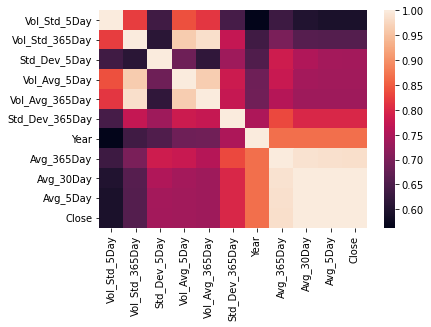

In [ ]:
strong_corrs = sorted_corrmat[sorted_corrmat > 0.6]
corrmat = train[strong_corrs.index].corr()
sns.heatmap(corrmat)

In [ ]:
# Lists
features = strong_corrs.index.drop(['Close'])
target = ['Close']
temp_df = pd.DataFrame(test['Close'])
features

Index(['Vol_Std_5Day', 'Vol_Std_365Day', 'Std_Dev_5Day', 'Vol_Avg_5Day',
       'Vol_Avg_365Day', 'Std_Dev_365Day', 'Year', 'Avg_365Day', 'Avg_30Day',
       'Avg_5Day'],
      dtype='object')

In [ ]:
# ML
lr = LinearRegression()
lr.fit(train[features], train[target])
temp_df['Predictions'] = lr.predict(test[features])
temp_df['error'] = np.absolute(temp_df['Predictions'] - temp_df['Close'])
mae = temp_df['error'].mean()
mae

16.044976058059717

## Summary

The mean absolute error has not really moved since the exclusion of features that did not correlate very well with the close price of the stock in question. This may be due to this being a prediction tool or the low weighting these features had on the model.             
        
Further experimentation could be done in using KFolds and exploration of indicator improvements or finding new indicators.                
It may also be useful to predict a number of days further into the future to enchance the prediction trends we would expect to see. Perhaps this would give a more accurate (lower MAE) prediction of stock price changes.

Thanks again to all for reading!         
I wish you all a great week!        
Best regards,        
Bill


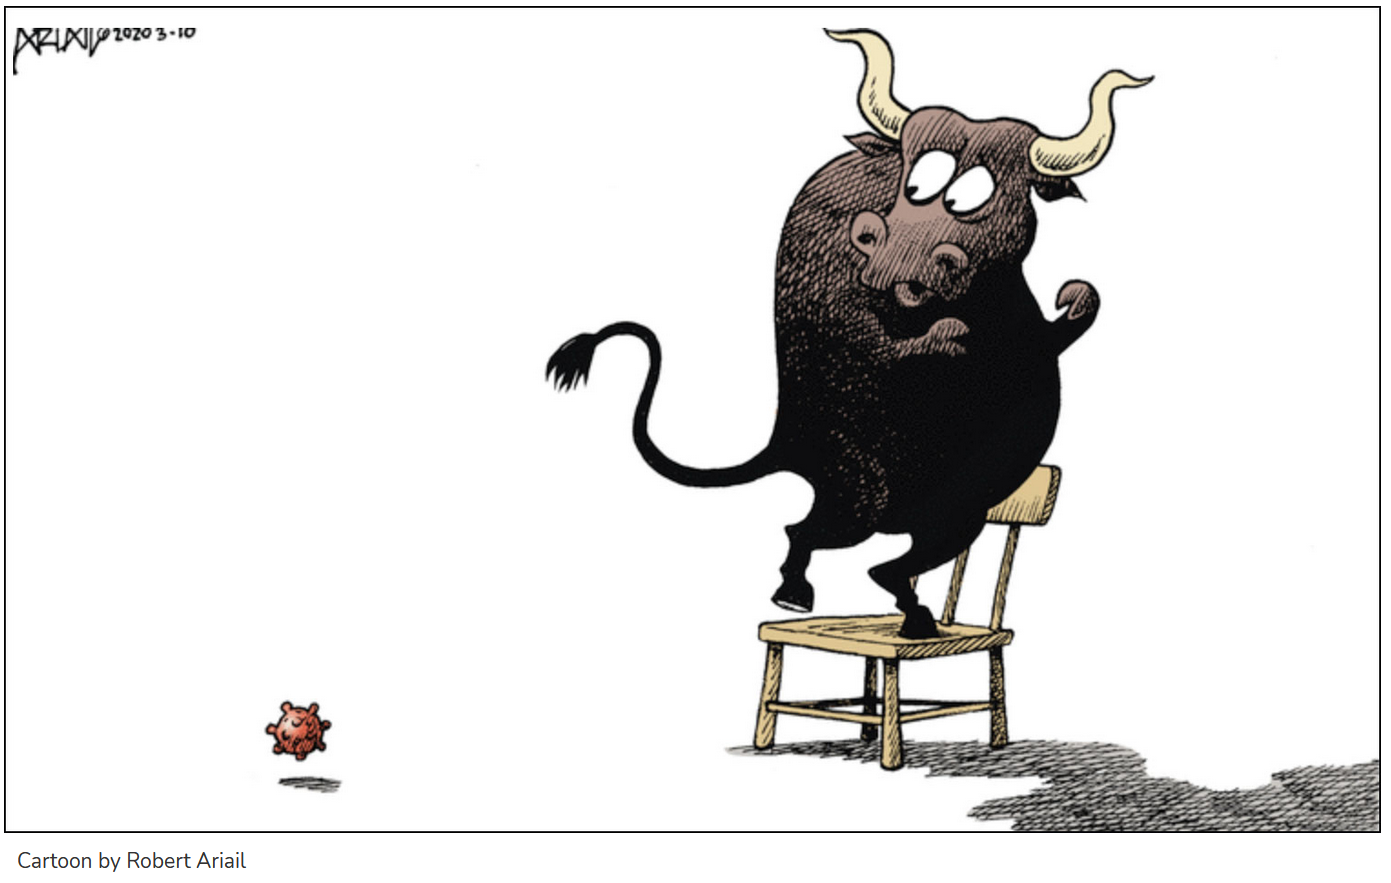


https://www.studentnewsdaily.com/editorial-cartoon-for-students/coronavirus-stock-market-robert-ariail/
